## 트럭을 지나는 다리

<div class="guide-section-description">
      <h6 class="guide-section-title">문제 설명</h6>
      <div class="markdown solarized-dark"><p>트럭 여러 대가 강을 가로지르는 일 차선 다리를 정해진 순으로 건너려 합니다. 모든 트럭이 다리를 건너려면 최소 몇 초가 걸리는지 알아내야 합니다. 트럭은 1초에 1만큼 움직이며, 다리 길이는 bridge_length이고 다리는 무게 weight까지 견딥니다.<br>
※ 트럭이 다리에 완전히 오르지 않은 경우, 이 트럭의 무게는 고려하지 않습니다.</p>

<p>예를 들어, 길이가 2이고 10kg 무게를 견디는 다리가 있습니다. 무게가 [7, 4, 5, 6]kg인 트럭이 순서대로 최단 시간 안에 다리를 건너려면 다음과 같이 건너야 합니다.</p>
<table class="table">
        <thead><tr>
<th>경과 시간</th>
<th>다리를 지난 트럭</th>
<th>다리를 건너는 트럭</th>
<th>대기 트럭</th>
</tr>
</thead>
        <tbody><tr>
<td>0</td>
<td>[]</td>
<td>[]</td>
<td>[7,4,5,6]</td>
</tr>
<tr>
<td>1~2</td>
<td>[]</td>
<td>[7]</td>
<td>[4,5,6]</td>
</tr>
<tr>
<td>3</td>
<td>[7]</td>
<td>[4]</td>
<td>[5,6]</td>
</tr>
<tr>
<td>4</td>
<td>[7]</td>
<td>[4,5]</td>
<td>[6]</td>
</tr>
<tr>
<td>5</td>
<td>[7,4]</td>
<td>[5]</td>
<td>[6]</td>
</tr>
<tr>
<td>6~7</td>
<td>[7,4,5]</td>
<td>[6]</td>
<td>[]</td>
</tr>
<tr>
<td>8</td>
<td>[7,4,5,6]</td>
<td>[]</td>
<td>[]</td>
</tr>
</tbody>
      </table>
<p>따라서, 모든 트럭이 다리를 지나려면 최소 8초가 걸립니다.</p>

<p>solution 함수의 매개변수로 다리 길이 bridge_length, 다리가 견딜 수 있는 무게 weight, 트럭별 무게 truck_weights가 주어집니다. 이때 모든 트럭이 다리를 건너려면 최소 몇 초가 걸리는지 return 하도록 solution 함수를 완성하세요.</p>

<h5>제한 조건</h5>

<ul>
<li>bridge_length는 1 이상 10,000 이하입니다.</li>
<li>weight는 1 이상 10,000 이하입니다.</li>
<li>truck_weights의 길이는 1 이상 10,000 이하입니다.</li>
<li>모든 트럭의 무게는 1 이상 weight 이하입니다.</li>
</ul>

<h5>입출력 예</h5>
<table class="table">
        <thead><tr>
<th>bridge_length</th>
<th>weight</th>
<th>truck_weights</th>
<th>return</th>
</tr>
</thead>
        <tbody><tr>
<td>2</td>
<td>10</td>
<td>[7,4,5,6]</td>
<td>8</td>
</tr>
<tr>
<td>100</td>
<td>100</td>
<td>[10]</td>
<td>101</td>
</tr>
<tr>
<td>100</td>
<td>100</td>
<td>[10,10,10,10,10,10,10,10,10,10]</td>
<td>110</td>
</tr>
</tbody>
      </table>
<p><a href="http://icpckorea.org/2016/ONLINE/problem.pdf" target="_blank" rel="noopener">출처</a></p>
</div>
    </div>

In [172]:
# 1. 지나가야 하는 길이가 주어진 다리 ing
# 2. 대기 중이거나 다리 위에 있는 트럭이 없을 때까지 반복
# 3. 현재 다리 무게 변수에 다리 도착점에 있는 무게를 뺌
# 4. 다리의 도착점을 pop으로 뽑아냄. 
# 5. 다리의 출발점에 0을 append
# 6. 만약 무게가 여유있으면 출발점에 트럭을 하나 추가
# 6-1. 먼저 현재 무게에 들어오는 트럭의 무게 더함
# 6-2. 다리의 출발점에 입장하는 트럭을 넣음

# 처음에 current_weight를 안쓰고 그냥 sum(ing)로 현재 무게를 체크했는데
# 한 문제가 시간초과로 통과를 안시켜줘서 이렇게 풀었음

def solution(bridge_length, weight, truck_weights):
    ing = [0] * bridge_length
    answer = 0
    current_weight = 0
    
    while len(truck_weights) > 0 or current_weight > 0:
        answer += 1
        current_weight -= ing[0]
        ing.pop(0)
        ing.append(0)

        if len(truck_weights) > 0 and weight >= truck_weights[0] + current_weight:
            current_weight += truck_weights[0]
            ing[-1] = truck_weights.pop(0)
        
    return answer

length = 100
weight = 100
trucks = [10,10,10,10,10,10,10,10,10,10]
solution(length, weight, trucks)

110

## 쇠막대기

여러 개의 쇠막대기를 레이저로 절단하려고 합니다. 효율적인 작업을 위해서 쇠막대기를 아래에서 위로 겹쳐 놓고, 레이저를 위에서 수직으로 발사하여 쇠막대기들을 자릅니다. 쇠막대기와 레이저의 배치는 다음 조건을 만족합니다.</p>
<div class="highlight"><pre class="codehilite"><code>- 쇠막대기는 자신보다 긴 쇠막대기 위에만 놓일 수 있습니다.
- 쇠막대기를 다른 쇠막대기 위에 놓는 경우 완전히 포함되도록 놓되, 끝점은 겹치지 않도록 놓습니다.
- 각 쇠막대기를 자르는 레이저는 적어도 하나 존재합니다.
- 레이저는 어떤 쇠막대기의 양 끝점과도 겹치지 않습니다.
</code></pre></div>
<p>아래 그림은 위 조건을 만족하는 예를 보여줍니다. 수평으로 그려진 굵은 실선은 쇠막대기이고, 점은 레이저의 위치, 수직으로 그려진 점선 화살표는 레이저의 발사 방향입니다.</p>

<p><img src="https://grepp-programmers.s3.amazonaws.com/files/ybm/dbd166625b/d3ae656b-bb7b-421c-9f74-fa9ea800b860.png" title="" alt="image0.png"></p>

<p>이러한 레이저와 쇠막대기의 배치는 다음과 같이 괄호를 이용하여 왼쪽부터 순서대로 표현할 수 있습니다.</p>
<div class="highlight"><pre class="codehilite"><code>(a) 레이저는 여는 괄호와 닫는 괄호의 인접한 쌍 '()'으로 표현합니다. 또한 모든 '()'는 반드시 레이저를 표현합니다.
(b) 쇠막대기의 왼쪽 끝은 여는 괄호 '('로, 오른쪽 끝은 닫힌 괄호 ')'로 표현됩니다.
</code></pre></div>
<p>위 예의 괄호 표현은 그림 위에 주어져 있습니다.<br>
쇠막대기는 레이저에 의해 몇 개의 조각으로 잘리는데, 위 예에서 가장 위에 있는 두 개의 쇠막대기는 각각 3개와 2개의 조각으로 잘리고, 이와 같은 방식으로 주어진 쇠막대기들은 총 17개의 조각으로 잘립니다.</p>

<p>쇠막대기와 레이저의 배치를 표현한 문자열 arrangement가 매개변수로 주어질 때, 잘린 쇠막대기 조각의 총 개수를 return 하도록 solution 함수를 작성해주세요.</p>

<h5>제한사항</h5>

<ul>
<li>arrangement의 길이는 최대 100,000입니다.</li>
<li>arrangement의 여는 괄호와 닫는 괄호는 항상 쌍을 이룹니다.</li>
</ul>

<h5>입출력 예</h5>
<table class="table">
        <thead><tr>
<th>arrangement</th>
<th>return</th>
</tr>
</thead>
        <tbody><tr>
<td><q>()(((()())(())()))(())</q></td>
<td>17</td>
</tr>
</tbody>
      </table>
  
 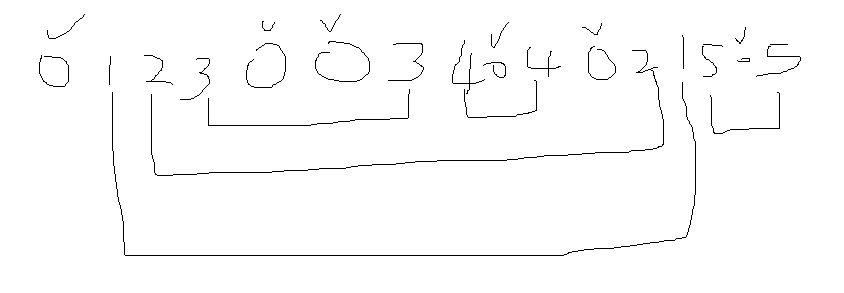

In [209]:
# 레이저는 0
# open num으로 (에 순서대로 숫자 부여
# 이 때 close list에 순서대로 쌓음
# )가 매칭 될 때마다 뒤에서부터 빼서 매칭함

# 경계 숫자와 리스트가 주어졌을 때 경계 인덱스를 찾고 
# 그 안에 0이 몇 개 있는지 세는 함수
def getPiece(num, li):
    start, end = [i for i, e in enumerate(li) if e == num]
    return li[start+1:end].count(0)    

def solution(arrangement):
    answer = 0
    open_num = 0
    close_list = []
    num_list = []
    for i, c in enumerate(arrangement):
        # (?
        if c == '(':
            # 레이저?
            if arrangement[i+1] == ')':
                num_list.append(-1)
            # open 숫자 부여
            else:
                open_num += 1
                close_list.append(open_num)
                num_list.append(open_num)
        # )이면서 레이저가 아닐때 = 바로 전 괄호가 (이 아님
        elif arrangement[i-1] != '(':
            # close 숫자 부여
            num_list.append(close_list[-1])
            answer += getPiece(close_list[-1], num_list[:i]) + 1
            close_list.pop()
    return answer


arrangement = '()(((()())(())()))(())'
solution(arrangement)

17

시간초과 너무 많음 ㅠㅠ

## 괄호 변환

<div class="guide-section-description">
      <h6 class="guide-section-title">문제 설명</h6>
      <div class="markdown solarized-dark"><p>카카오에 신입 개발자로 입사한 <strong><q>콘</q></strong>은 선배 개발자로부터 개발역량 강화를 위해 다른 개발자가 작성한 소스 코드를 분석하여 문제점을 발견하고 수정하라는 업무 과제를 받았습니다. 소스를 컴파일하여 로그를 보니 대부분 소스 코드 내 작성된 괄호가 개수는 맞지만 짝이 맞지 않은 형태로 작성되어 오류가 나는 것을 알게 되었습니다.<br>
수정해야 할 소스 파일이 너무 많아서 고민하던 <q>콘</q>은 소스 코드에 작성된 모든 괄호를 뽑아서 올바른 순서대로 배치된 괄호 문자열을 알려주는 프로그램을 다음과 같이 개발하려고 합니다.</p>

<h3>용어의 정의</h3>

<p><strong>'('</strong> 와 <strong>')'</strong> 로만 이루어진 문자열이 있을 경우, '(' 의 개수와 ')' 의 개수가 같다면 이를 <strong><code>균형잡힌 괄호 문자열</code></strong>이라고 부릅니다.<br>
그리고 여기에 '('와 ')'의 괄호의 짝도 모두 맞을 경우에는 이를 <strong><code>올바른 괄호 문자열</code></strong>이라고 부릅니다.<br>
예를 들어, <code>"(()))("</code>와 같은 문자열은 <q>균형잡힌 괄호 문자열</q> 이지만 <q>올바른 괄호 문자열</q>은 아닙니다.<br>
반면에 <code>"(())()"</code>와 같은 문자열은 <q>균형잡힌 괄호 문자열</q> 이면서 동시에 <q>올바른 괄호 문자열</q> 입니다.</p>

<p>'(' 와 ')' 로만 이루어진 문자열 w가 <q>균형잡힌 괄호 문자열</q> 이라면 다음과 같은 과정을 통해 <q>올바른 괄호 문자열</q>로 변환할 수 있습니다.</p>
<div class="highlight"><pre class="codehilite"><code>1. 입력이 빈 문자열인 경우, 빈 문자열을 반환합니다. 
2. 문자열 w를 두 "균형잡힌 괄호 문자열" u, v로 분리합니다. 단, u는 "균형잡힌 괄호 문자열"로 더 이상 분리할 수 없어야 하며, v는 빈 문자열이 될 수 있습니다. 
3. 문자열 u가 "올바른 괄호 문자열" 이라면 문자열 v에 대해 1단계부터 다시 수행합니다. 
  3-1. 수행한 결과 문자열을 u에 이어 붙인 후 반환합니다. 
4. 문자열 u가 "올바른 괄호 문자열"이 아니라면 아래 과정을 수행합니다. 
  4-1. 빈 문자열에 첫 번째 문자로 '('를 붙입니다. 
  4-2. 문자열 v에 대해 1단계부터 재귀적으로 수행한 결과 문자열을 이어 붙입니다. 
  4-3. ')'를 다시 붙입니다. 
  4-4. u의 첫 번째와 마지막 문자를 제거하고, 나머지 문자열의 괄호 방향을 뒤집어서 뒤에 붙입니다. 
  4-5. 생성된 문자열을 반환합니다.
</code></pre></div>
<p><strong><q>균형잡힌 괄호 문자열</q></strong> p가 매개변수로 주어질 때, 주어진 알고리즘을 수행해 <strong><q>올바른 괄호 문자열</q></strong>로 변환한 결과를 return 하도록 solution 함수를 완성해 주세요.</p>

<h3>매개변수 설명</h3>

<ul>
<li>p는 '(' 와 ')' 로만 이루어진 문자열이며 길이는 2 이상 1,000 이하인 짝수입니다.</li>
<li>문자열 p를 이루는 '(' 와 ')' 의 개수는 항상 같습니다.</li>
<li>만약 p가 이미 <q>올바른 괄호 문자열</q>이라면 그대로 return 하면 됩니다.</li>
</ul>

<hr>

<h3>입출력 예</h3>
<table class="table">
        <thead><tr>
<th>p</th>
<th>result</th>
</tr>
</thead>
        <tbody><tr>
<td><code>"(()())()"</code></td>
<td><code>"(()())()"</code></td>
</tr>
<tr>
<td><code>")("</code></td>
<td><code>"()"</code></td>
</tr>
<tr>
<td><code>"()))((()"</code></td>
<td><code>"()(())()"</code></td>
</tr>
</tbody>
      </table>
<h3>입출력 예에 대한 설명</h3>

<p><strong>입출력 예 #1</strong><br>
이미 <q>올바른 괄호 문자열</q> 입니다.</p>

<p><strong>입출력 예 #2</strong></p>

<ul>
<li>두 문자열 u, v로 분리합니다.

<ul>
<li>u = <code>")("</code></li>
<li>v = <code>""</code></li>
</ul></li>
<li>u가 <q>올바른 괄호 문자열</q>이 아니므로 다음과 같이 새로운 문자열을 만듭니다.

<ul>
<li>v에 대해 1단계부터 재귀적으로 수행하면 빈 문자열이 반환됩니다.</li>
<li>u의 앞뒤 문자를 제거하고, 나머지 문자의 괄호 방향을 뒤집으면 <code>""</code>이 됩니다.</li>
<li>따라서 생성되는 문자열은 <code>"("</code> + <code>""</code> + <code>")"</code> + <code>""</code>이며, 최종적으로 <code>"()"</code>로 변환됩니다.</li>
</ul></li>
</ul>

<p><strong>입출력 예 #3</strong></p>

<ul>
<li>두 문자열 u, v로 분리합니다.

<ul>
<li>u =  <code>"()"</code></li>
<li>v =  <code>"))((()"</code></li>
</ul></li>
<li>문자열 u가 <q>올바른 괄호 문자열</q>이므로 그대로 두고, v에 대해 재귀적으로 수행합니다.</li>
<li>다시 두 문자열 u, v로 분리합니다.

<ul>
<li>u = <code>"))(("</code></li>
<li>v = <code>"()"</code></li>
</ul></li>
<li>u가 <q>올바른 괄호 문자열</q>이 아니므로 다음과 같이 새로운 문자열을 만듭니다.

<ul>
<li>v에 대해 1단계부터 재귀적으로 수행하면 <code>"()"</code>이 반환됩니다.</li>
<li>u의 앞뒤 문자를 제거하고, 나머지 문자의 괄호 방향을 뒤집으면 <code>"()"</code>이 됩니다.</li>
<li>따라서 생성되는 문자열은 <code>"("</code> + <code>"()"</code> + <code>")"</code> + <code>"()"</code>이며, 최종적으로 <code>"(())()"</code>를 반환합니다.</li>
</ul></li>
<li>처음에 그대로 둔 문자열에 반환된 문자열을 이어 붙이면 <code>"()"</code> + <code>"(())()"</code> = <code>"()(())()"</code>가 됩니다.</li>
</ul>
</div>
    </div>

In [255]:
# 문제설명 그대로 따라가면 답이 나오나?
def solution(w):
    #1. 입력이 빈 문자열인 경우, 빈 문자열을 반환합니다. 
    if w == "": 
        return w
    #2. 문자열 w를 두 "균형잡힌 괄호 문자열" u, v로 분리합니다. 단, u는 "균형잡힌 괄호 문자열"로 더 이상 분리할 수 없어야 하며, v는 빈 문자열이 될 수 있습니다. 
    u, v = splitBalanced(w)
    #3. 문자열 u가 "올바른 괄호 문자열" 이라면 문자열 v에 대해 1단계부터 다시 수행합니다. 
    #3-1. 수행한 결과 문자열을 u에 이어 붙인 후 반환합니다. 
    if isRight(u):
        return u + solution(v)
    #4. 문자열 u가 "올바른 괄호 문자열"이 아니라면 아래 과정을 수행합니다. 
    else:
        #4-1. 빈 문자열에 첫 번째 문자로 '('를 붙입니다. 
        temp = '('
        #4-2. 문자열 v에 대해 1단계부터 재귀적으로 수행한 결과 문자열을 이어 붙입니다. 
        temp += solution(v)
        #4-3. ')'를 다시 붙입니다. 
        temp += ')'
        #4-4. u의 첫 번째와 마지막 문자를 제거하고, 나머지 문자열의 괄호 방향을 뒤집어서 뒤에 붙입니다. 
        u = list(u[1:-1])
        for i, e in enumerate(u):
            if e == '(':
                u[i] = ')'
            else:
                u[i] = '('
        #4-5. 생성된 문자열을 반환합니다.
        return temp + ''.join(u)
    
# 이제 직접 2번과 3번의 함수를 직접 만들어야 함
# 입력에서 균형이 깨지는 부분부터 둘로 나누자
def splitBalanced(x):
    num = 0
    for i, e in enumerate(x):
        if e == ')':
            num -= 1
        else:
            num += 1
        if num == 0:
            return x[:i+1], x[i+1:]
    return x, ''

def isRight(x):
    li = []
    for i in x:
        if i == ')':
            if len(li) == 0:
                return False
            li.pop()
        else:
            li.append(i)
    if len(li) != 0:
        return False
    return True

# 2개의 함수가 비슷한 부분이 많아서 
# 하나의 함수로 퉁칠 수 있을까 시도를 해봤는데 실력부족으로 실패했다.

In [256]:
a = '()))((()'
# ()))((()
print(splitBalanced(a))

('()', '))((()')


In [257]:
solution(a)

'()(())()'

## LIS
#### 문제
어떤 정수 수열에서 0개 이상의 숫자를 지우면 이 수열의 부분 수열 (subsequence) 를 얻을 수 있다. 예를 들어 10 7 4 9 의 부분 수열에는 7 4 9, 10 4, 10 9 등이 있다. 단, 10 4 7 은 원래 수열의 순서와 다르므로 10 7 4 9 의 부분 수열이 아니다.

어떤 부분 수열이 순증가할 때 이 부분 수열을 증가 부분 수열 (increasing subsequence) 라고 한다. 주어진 수열의 증가 부분 수열 중 가장 긴 것의 길이를 계산하는 프로그램을 작성하라.

어떤 수열의 각 수가 이전의 수보다 클 때, 이 수열을 순증가 한다고 한다.

#### 입력
입력의 첫 줄에는 테스트 케이스의 수 C (<= 50) 가 주어진다. 각 테스트 케이스의 첫 줄에는 수열에 포함된 원소의 수 N (<= 500) 이 주어진다. 그 다음 줄에 수열이 N개의 정수가 주어진다. 각 정수는 1 이상 100,000 이하의 자연수이다.

#### 출력
각 테스트케이스마다 한 줄씩, 주어진 수열의 가장 긴 증가 부분 수열의 길이를 출력한다.

#### 예제 입력
3\
4\
1 2 3 4\
8\
5 4 3 2 1 6 7 8 \
8\
5 6 7 8 1 2 3 4
#### 예제 출력
4\
4\
4

In [18]:
# 책에서 나온 핵심 아이디어 
# lis(start) = S[start]에서 시작하는 부분 증가 중 최대 길이

def solution(start):
    # 캐시에 연산 기록있으면 리턴
    if cache[start+1] != -1:
        return cache[start+1]
    # 어떻게든 최소 1 보장
    ret = 1
    for i in range(start+1, n):
        # 부분 증가수열을 찾으면서 가능한 길이를 늘린다.
        if start == -1 or S[start] < S[i]:
            ret = max(ret, solution(i) + 1)
    # 캐시에 찾았던 길이를 저장
    cache[start+1] = ret
    return ret

for _ in range(int(input())):
    n = int(input())
    S = list(map(int, input().split()))
    cache = [-1] * (n+1)
    result = 0 
    # 0부터 n까지 start를 조절하면서 최대 길이를 찾는다.
    for j in range(0,n):
        result = max(result, solution(j))
    print(result)

# 책에서 더 빠른 해법으로 나온 방법은 뭘 말하고 싶은지는 알겠는데
# 막상 어떻게 풀지 감이 안온다...

1
8
5 4 3 2 1 6 7 8
4


## 합친 LIS

#### 문제
어떤 수열에서 0개 이상의 숫자를 지운 결과를 원 수열의 부분 수열이라고 부릅니다. 예를 들어 '4 7 6'은 '4 3 7 6 9'의 부분 수열입니다. 중복된 숫자가 없고 오름 차순으로 정렬되어 있는 부분 수열들을 가리켜 증가 부분 수열이라고 부르지요. 예를 들어 '3 6 9'는 앞의 수열의 증가 부분 수열입니다.

두 개의 정수 수열 A 와 B 에서 각각 증가 부분 수열을 얻은 뒤 이들을 크기 순서대로 합친 것을 합친 증가 부분 수열이라고 부르기로 합시다. 이 중 가장 긴 수열을 합친 LIS(JLIS, Joined Longest Increasing Subsequence)이라고 부릅시다. 예를 들어 '1 3 4 7 9' 은 '1 9 4' 와 '3 4 7' 의 JLIS입니다. '1 9' 와 '3 4 7' 을 합쳐 '1 3 4 7 9'를 얻을 수 있기 때문이지요.

A 와 B 가 주어질 때, JLIS의 길이를 계산하는 프로그램을 작성하세요.

#### 입력
입력의 첫 줄에는 테스트 케이스의 수 c ( 1 <= c <= 50 ) 가 주어집니다. 각 테스트 케이스의 첫 줄에는 A 와 B 의 길이 n 과 m 이 주어집니다 (1 <= n,m <= 100). 다음 줄에는 n 개의 정수로 A 의 원소들이, 그 다음 줄에는 m 개의 정수로 B 의 원소들이 주어집니다. 모든 원소들은 32비트 부호 있는 정수에 저장할 수 있습니다.

#### 출력
각 테스트 케이스마다 한 줄에, JLIS 의 길이를 출력합니다.

#### 예제 입력
3\
3 3\
1 2 4\
3 4 7\
3 3\
1 2 3\
4 5 6\
5 3\
10 20 30 1 2\
10 20 30
#### 예제 출력
5\
6\
5

In [33]:
### 이번 문제의 아이디어는
# jlis(indexA, indexB) = A[indexA]와 B[indexB] 에서 
#                        시작하는 합친 증가 부분 수열의 최대 길이 
# max로 jlis 구했으면 이 증가 부분 수열의 다음 숫자는 
# indexA+1 또는 indexB+1이후의 수열 중 jlis값보다 큰 수 중 하나이다.
# 결과적으로 길이는 1+jlis값이된다.

def jlis(indexA, indexB):
    # 기저
    if cache[indexA+1][indexB+1] != -1:
        return cache[indexA+1][indexB+1]
    ret=0
    if indexA == -1:
        a = float('-inf')
    else: a = A[indexA]
    if indexB == -1:
        b = float('-inf')
    else: b = B[indexB]
    maxElement = max(a,b)
    
    # 재귀로 원소 찾기
    for i in range(indexA+1, n):
        # A리스트
        if maxElement < A[i]:
            ret = max(ret, jlis(i, indexB) + 1)
    for i in range(indexB+1, m):
        if maxElement < B[i]:
            ret = max(ret, jlis(indexA, i) + 1)
    cache[indexA+1][indexB+1] = ret
    return ret

for _ in range(int(input())):
    cache = [[-1]*101 for i in range(101)]
    n, m = list(map(int, input().split()))
    A = list(map(int, input().split()))
    B = list(map(int, input().split()))
    result = 0 
    for j in range(0,n):
        result = max(result, jlis(-1,-1))
    print(result)
    
# 시간 초과가 나서 내 코드가 맞는지도 모르겠다...

3
3 3
1 2 4
3 4 7
5
3 3
1 2 3
4 5 6
6
5 3
10 20 30 1 2
10 20 30
5
